## <span style="color:darkblue">**Лабораторная работа 2. Генетические алгоритмы. Задание**</span> 

### Подключение библиотеки к своему проекту:

In [16]:
# подключение библиотек для выполнения задания
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import random

# установка вывода графиков в окне jupiter
%matplotlib inline

Импортируем необходимые пакеты по генетическим алгоритмам:

In [17]:
from deap import base
from deap import creator
from deap import tools

## Практическое задание 1

<span style="color:darkred">**Решить задачу поисковой оптимизации с применение кода CMA-ES на ландшафтных функциях:** </span>

**1. Функция Растригина** — невыпуклая функция, предложена в 1974 году Леонардом Растригиным как функция двух переменных и в 1991 году была обобщена на высшие размерности. Нахождение минимума этой функции является достаточно трудной задачей из-за большой области поиска и большого количества локальных минимумов:

$$f(x,y)=2*A+(x^2-A*cos(2\pi*x))+(y^2-A*cos(2\pi*y))\rightarrow min,\;A=10,\;x,y\in\left[-5.12;5.12\right]$$

**2. Функция Розенброка** (англ. Rosenbrock function, Rosenbrock's valley, Rosenbrock's banana function) — невыпуклая функция, предложенная Ховардом Розенброком (англ.) в 1960 году. Считается, что поиск глобального минимума для данной функции является нетривиальной задачей. Каноническое определение:

$$f(x,y)=(1-x)^2+100*(y-x^2)^2\rightarrow min,\;x,y\in[-\infty,\infty]$$

**3. Функция Химмельблау** (анг. Himmelblau) — мультимодальная функция двух переменных. Функция названа в честь Дэвида Мотнера Химельблау (1924—2011), который впервые её использовал. Определяется формулой:

$$f(x,y)=(x^2 + y - 11)^2 + (x + y^2 - 7)^2\rightarrow min,\;x,y\in\left[-5;5\right]$$

**4. Функция Де Янга** (анг. De Jong). Определяется формулой (**max**):

$$f(x,y)=3905.93-100*(x^2-y^2)^2-(1-x)^2 \rightarrow max,\;x,y\in\left[-2.048;2.048\right]$$


**5. Функция Стенгера** (анг. Stenger). Определяется формулой:

$$f(x,y)=(x^2-4y)^2+(x^2-2x+4y)^2 \rightarrow min,\;x,y\in\left[-1;4\right]$$

**6. Функция Мартина и Гадди** (анг. Martin, Gaddy). Определяется формулой:

$$f(x,y)=(x-y)^2+((x+y-10)/3)^2 \rightarrow min,\;x,y\in\left[-10;10\right]$$

**7. Функция Экли** (анг. Ackley). Определяется формулой:

$$f(x,y)=-20*e^{-0.2\sqrt{0.5(x^2+y^2)}} - e^{0.5(cos(2\pi*x)+cos(2\pi*y))} + 20 + e \rightarrow min,\;x,y\in\left[-100;100\right]$$

In [18]:
# определение функции
def FRose(x, y):
    return 2*10+(x*x-10*np.cos(2*np.pi*x))+(y*y-10*np.cos(2*np.pi*y));

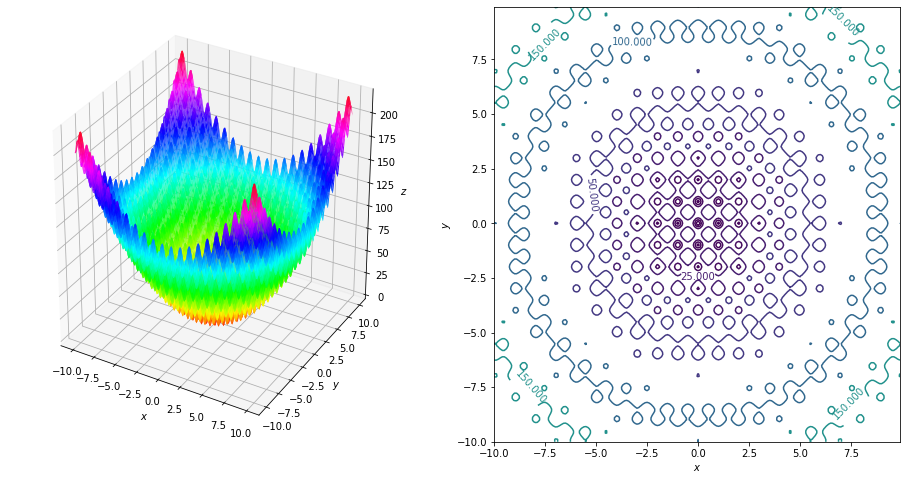

In [19]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

# определение данных
X = np.arange(-10, 10, .1)
Y = np.arange(-10, 10, .1)
X, Y = np.meshgrid(X, Y)

Z = FRose(X,Y)

# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

# создание графики
fig = plt.figure()

# вывод функции (1)
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

# построение поверхности
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hsv, 
                       linewidth=0, antialiased=True)

# вывод функции (2)
ax = fig.add_subplot(1, 2, 2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# построение линий уровня
cs = ax.contour(X, Y, Z, [0,2,5,10,25,50,100,150,300])

# добавление подписей к линиям уровня
ax.clabel(cs)

plt.show()

In [20]:
# определение функции
def FRose(individual):
    x = individual[0];
    y = individual[1];
    
    return 2*10+(x*x-10*np.cos(2*np.pi*x))+(y*y-10*np.cos(2*np.pi*y)),

In [21]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import cma
from deap import creator
from deap import tools

# Problem size
N=2;

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("evaluate", FRose)

def main():
    # The cma module uses the numpy random number generator
    np.random.seed(128)

    # The CMA-ES algorithm takes a population of one individual as argument
    # The centroid is set to a vector of 5.0
    strategy = cma.Strategy(centroid=[5.0]*N, sigma=5.0, lambda_=20*N)
    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    #logger = tools.EvolutionLogger(stats.functions.keys())
   
    # The CMA-ES algorithm converge with good probability with those settings
    pop, logbook = algorithms.eaGenerateUpdate(toolbox, ngen=55, stats=stats, halloffame=hof, verbose = False)
    
    return pop, logbook, hof

In [22]:
pop, stats, hof = main();

In [23]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

Best individual is [-4.5306611990198913e-10, -7.567215676342531e-10], (0.0,)


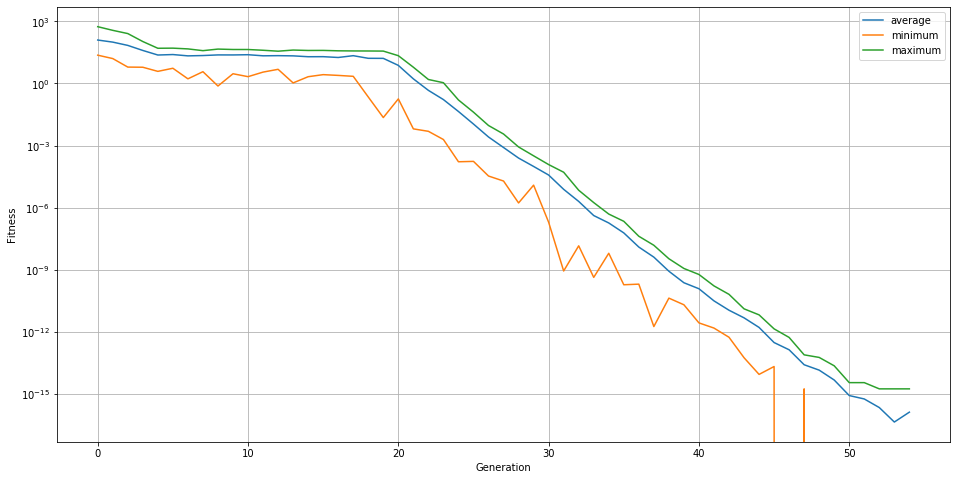

In [24]:
# установка размера графика
plt.rcParams['figure.figsize'] = (16,8) 

gen, avg, min_, max_ = stats.select("gen", "avg", "min", "max")
plt.semilogy(gen, avg, label="average")
plt.semilogy(gen, min_, label="minimum")
plt.semilogy(gen, max_, label="maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.legend(loc="upper right")
plt.grid()
plt.show()

## Практическое задание 2

<span style="color:darkred">**3. Реализовать задачу о рюкзаке** </span>

Задача о рюкзаке (или задача о ранце) — задача комбинаторной оптимизации. Своё название получила от конечной цели: уложить как можно большее число ценных вещей в рюкзак при условии, что вместимость рюкзака ограничена. С различными вариациями задачи о рюкзаке можно столкнуться в экономике, прикладной математике, криптографии и логистике.

В общем виде задачу можно сформулировать так: из заданного множества предметов со свойствами "стоимость" и "вес" требуется отобрать подмножество с максимальной полной стоимостью, соблюдая при этом ограничение на суммарный вес.

In [40]:
#Задача о рюкзаке
from itertools import combinations

items = (
   ('Кубик 1', 1, 2),
   ('Кубик 2', 2, 3),
   ('Кубик 3', 3, 5),
   ('Кубик 4', 4, 6),
   ('Кубик 5', 5, 7),
   ('Кубик 6', 6, 9),
)

total_volume = 0
for item in items:
   total_volume += item[1]

VOLUME = 20


def calcBackPackVol(backpack):
   total_volume = 0
   for item in backpack:
       total_volume += item[1]

   return total_volume


def calcBackPackCost(backpack):
   total_cost = 0
   for item in backpack:
       total_cost += item[2]

   return total_cost


print("в распоряжении {} предметов общим объемом {} л,\
которые необходимо уложить в рюкзак {} литров".\
     format(len(items), total_volume, VOLUME))


counter = 0
max_cost = 0
result_items = []
result_costs = []

for num in range(1, len(items) + 1):
   for i, combination in enumerate(combinations(items, num), 1):
       current_volume = calcBackPackVol(combination)
       current_cost = calcBackPackCost(combination)
       if current_volume <= VOLUME and current_cost >= max_cost:
           counter += 1
           max_cost = current_cost
           result_items.append(combination)
           result_costs.append(current_cost)
           print("комбинация {} набрала цену {} и объем {:3.2f} л: {}".\
                 format(counter, current_cost, current_volume, combination))

max_cost_count = result_costs.count(max_cost)

print("удалось {} раз добиться максимальной ценности {}".\
     format(max_cost_count, max_cost))


best_result = result_items[result_costs.index(max_cost)]

# print(best_result)
#print(calcBackPackVol(best_result))

[print(item) for item in best_result]

в распоряжении 6 предметов общим объемом 21 л,которые необходимо уложить в рюкзак 20 литров
комбинация 1 набрала цену 2 и объем 1.00 л: (('Кубик 1', 1, 2),)
комбинация 2 набрала цену 3 и объем 2.00 л: (('Кубик 2', 2, 3),)
комбинация 3 набрала цену 5 и объем 3.00 л: (('Кубик 3', 3, 5),)
комбинация 4 набрала цену 6 и объем 4.00 л: (('Кубик 4', 4, 6),)
комбинация 5 набрала цену 7 и объем 5.00 л: (('Кубик 5', 5, 7),)
комбинация 6 набрала цену 9 и объем 6.00 л: (('Кубик 6', 6, 9),)
комбинация 7 набрала цену 9 и объем 6.00 л: (('Кубик 1', 1, 2), ('Кубик 5', 5, 7))
комбинация 8 набрала цену 11 и объем 7.00 л: (('Кубик 1', 1, 2), ('Кубик 6', 6, 9))
комбинация 9 набрала цену 12 и объем 8.00 л: (('Кубик 2', 2, 3), ('Кубик 6', 6, 9))
комбинация 10 набрала цену 12 и объем 8.00 л: (('Кубик 3', 3, 5), ('Кубик 5', 5, 7))
комбинация 11 набрала цену 14 и объем 9.00 л: (('Кубик 3', 3, 5), ('Кубик 6', 6, 9))
комбинация 12 набрала цену 15 и объем 10.00 л: (('Кубик 4', 4, 6), ('Кубик 6', 6, 9))
комбинация 

[None, None, None, None, None]